# Analiza Danych - Ocena gier

In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [517]:
df = pd.read_csv('07_Video Games.csv')

### Zmiana nazw kolumn na **polskie**

In [518]:
df = df.rename (columns = {'Console':'Platforma','GameName':'Nazwa gry','Review':'Recenzja','Score':'Ocena'})

### Wyświetlmy nagłówek tej ramki danych za pomocą funkcji **head()**:

In [519]:
df.head()

,Platforma,Nazwa gry,Recenzja,Ocena
0,PC,Baldur's Gate 3 Early Access Review,Early Access,6
1,NS,Control: Ultimate Edition Cloud Version Review,Good,7
2,"XONE, PC, PS4",Doom Eternal: The Ancient Gods Part 1 Review,Good,7
3,"XONE, PC, PS4",Watch Dogs: Legion Review,Great,8
4,PC,Ring Of Pain Review,Great,8


In [520]:
df.shape

(14801, 4)

### Najmniejszą ocene jaką otrzymała gra jest **1**, a największą **9** 

In [521]:
df.describe().round()

,Ocena
count,14801.0
mean,6.0
std,2.0
min,1.0
25%,6.0
50%,7.0
75%,8.0
max,9.0


### Średnia oceny gier wynosi **6,43**

In [522]:
average = df['Ocena'].mean().round(2)
print(average)

6.43


### Przeważnie gry otrzymują tytuł oceny: **Good(Dobra), Great(Świetna), Fair(W porządku)**
###  W tabelce poniżej występuje także zliczenie ich **ilości**

In [523]:
element_counts = df['Recenzja'].value_counts().reset_index()
element_counts.columns = ['Recenzja','Ilość']
print(element_counts)

        Recenzja  Ilość
0           Good   4118
1          Great   3251
2           Fair   2888
3       Mediocre   1807
4           Poor   1041
5         Superb    848
6            Bad    540
7       Terrible    226
8        Abysmal     59
9      Essential     20
10  Early Access      3


### Wykorzystanie biblioteki matplotlib do wydrukowania wykresu **Recenzji gier**

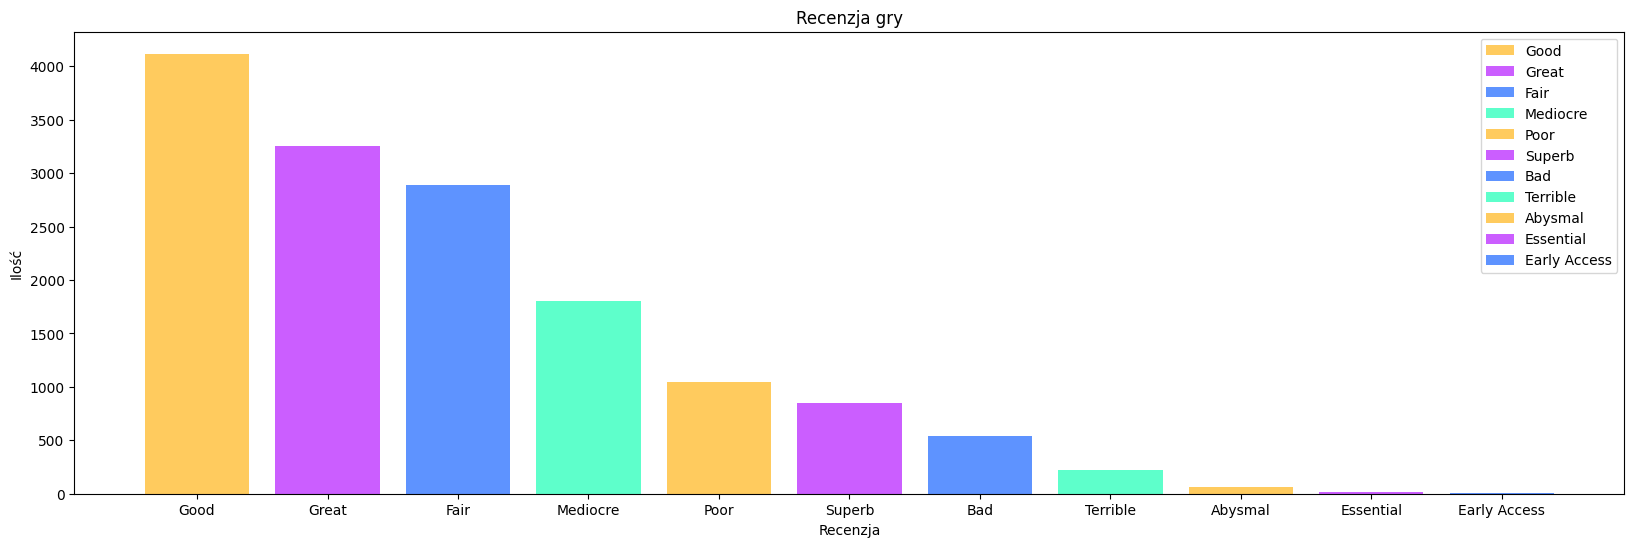

In [524]:
element_counts = df['Recenzja'].value_counts()
bars = plt.bar(element_counts.index, element_counts.values, color=['#FFCB5E','#CB5EFF','#5E93FF','#5EFFCB'])

fig = plt.gcf()
fig.set_size_inches(20, 6)

plt.title('Recenzja gry')
plt.xlabel('Recenzja')
plt.ylabel('Ilość')

plt.legend(bars, element_counts.index)

plt.show()

### Wykorzystanie biblioteki seaborn, do wydrukowania wykresu **Oceny gier**

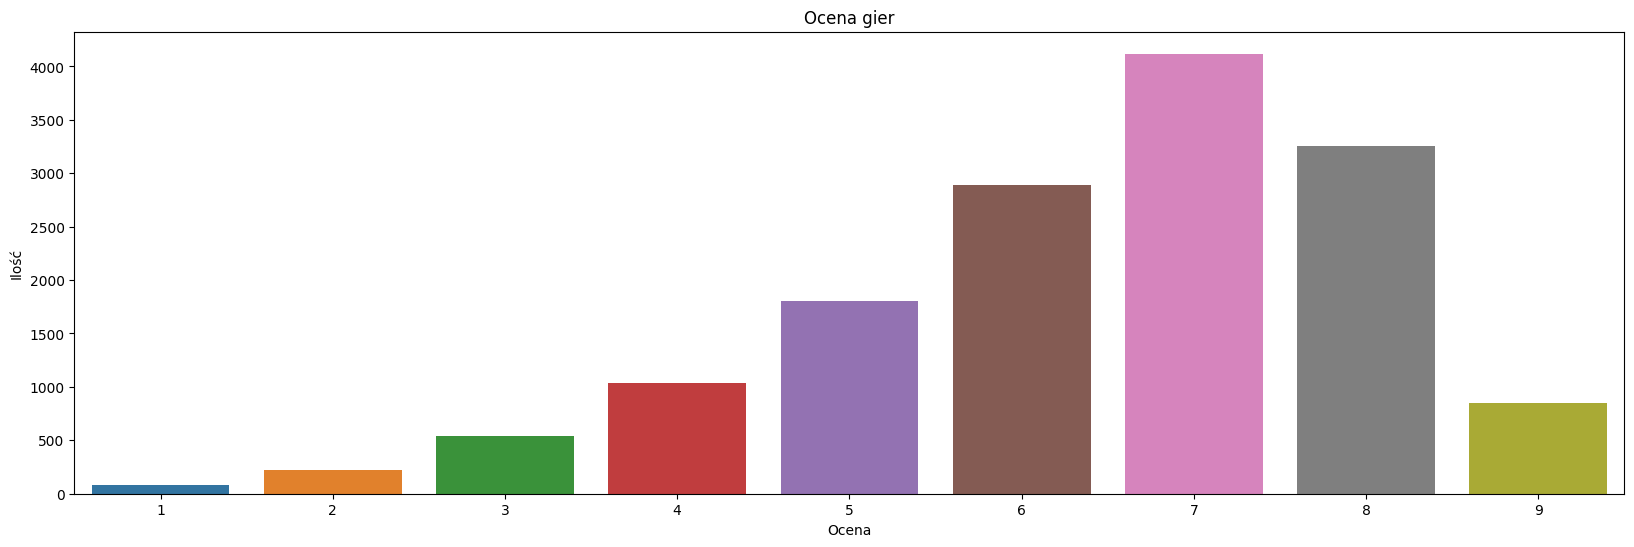

In [525]:
element_counts = df['Ocena'].value_counts()

ax = sns.barplot(x=element_counts.index, y=element_counts.values)

fig = plt.gcf()
fig.set_size_inches(20, 6)

plt.title('Ocena gier')
plt.xlabel('Ocena')
plt.ylabel('Ilość')


plt.show()

### Sortowanie gier według **Oceny** od najmniejszej do największej

In [526]:
table = df[['Nazwa gry', 'Recenzja', 'Ocena']]
table.sort_values(by = 'Ocena')

,Nazwa gry,Recenzja,Ocena
118,Rainbow Six Siege Review (2020) - Breaches And...,Essential,1
10581,Big Rigs: Over the Road Racing Review,Abysmal,1
5916,China Warrior Review,Abysmal,1
9161,Uno Review,Abysmal,1
5863,Deal or No Deal Review,Abysmal,1
...,...,...,...
2487,Max Payne 3 Review,Superb,9
2488,Max Payne 3 Review,Superb,9
4063,Braid Review,Superb,9
11333,World Series Baseball 2K3 Review,Superb,9


In [527]:
ilosc_platform = df.shape[0]
print("Całkowita ilość platform")
print()


liczba_platform_z_poszczególnych_gier = df.value_counts('Nazwa gry', ascending=False)
print(liczba_platform_z_poszczególnych_gier)

Całkowita ilość platform

Nazwa gry
Madden NFL 08 Review                     9
Open Season Review                       9
Ratatouille Review                       9
Madden NFL 06 Review                     9
Surf's Up Review                         9
                                        ..
Happy Tree Friends False Alarm Review    1
Happy Wars Review                        1
Harbinger Review                         1
Hard Reset Review                        1
vib-ribbon (Import) Review               1
Name: count, Length: 11256, dtype: int64


### Histogram **Ocen gier**

(array([  79.,  226.,  540., 1041.,    0., 1807., 2890., 4119., 3251.,
         848.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

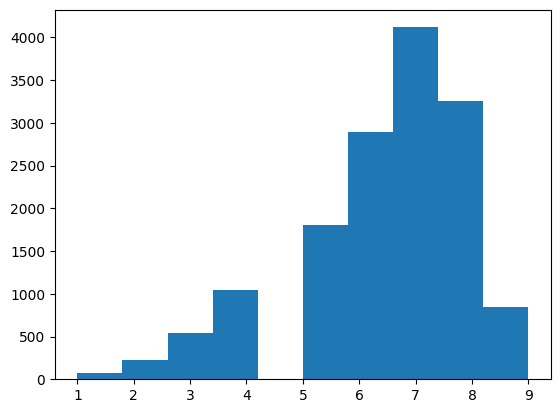

In [528]:
plt.hist(df['Ocena'])